<a href="https://colab.research.google.com/github/isacprogram/Projeto-EBAC/blob/main/ULTILIZANDO_GROUPBY_COMO_RECURSO_AVALIATIVO_ISAC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:

sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
df_sinasc = sinasc_raw
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


## verificando colunas


In [13]:
df_sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [10]:
df_sinasc.IDADEMAE.head()

0    19
1    29
2    37
3    30
4    30
Name: IDADEMAE, dtype: int64

In [12]:
df_sinasc.IDADEPAI.head()

0    26.0
1    24.0
2    32.0
3    24.0
4    27.0
Name: IDADEPAI, dtype: float64

# Ultilizando groupby como recurso avaliativo

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [19]:
idade_media_mae = df_sinasc.groupby('munResNome')['IDADEMAE','IDADEPAI'].mean()
idade_media_mae

<ipython-input-19-a7c1c5286f99>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  idade_media_mae = df_sinasc.groupby('munResNome')['IDADEMAE','IDADEPAI'].mean()


,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


#gráfico para melhor entendimento dos dados

Text(0, 0.5, 'Idade media de mãe e pai por munincípios ')

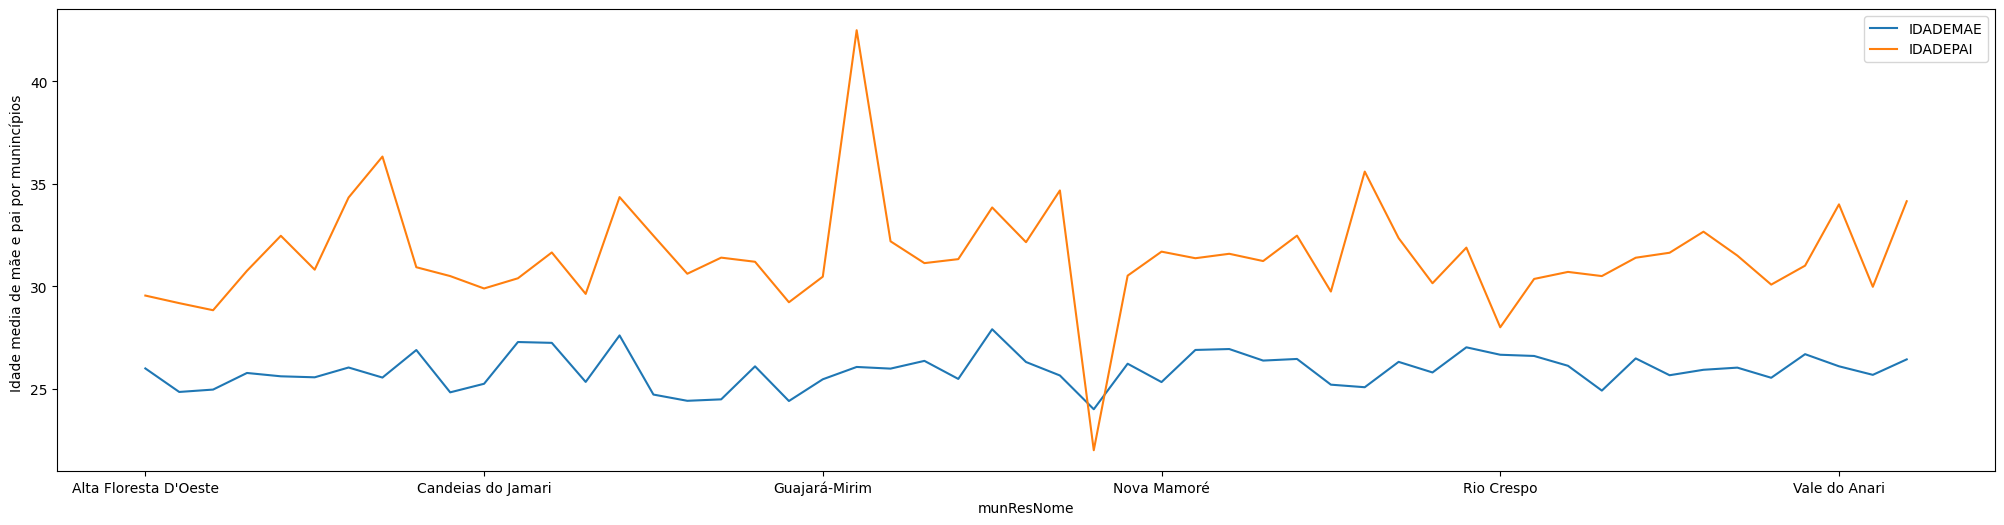

In [24]:
idade_media_mae.plot(figsize=[25,6])
plt.ylabel('Idade media de mãe e pai por munincípios ')

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [38]:
peso_medio_mas = df_sinasc[df_sinasc['SEXO'] == 'Masculino'].groupby('ESCMAE')['PESO'].mean()
peso_medio_fem = df_sinasc[df_sinasc['SEXO'] == 'Feminino' ].groupby('ESCMAE')['PESO'].mean()

In [39]:
peso_medio_mas

ESCMAE
1 a 3 anos         3191.354386
12 anos ou mais    3309.658421
4 a 7 anos         3288.963439
8 a 11 anos        3305.898320
Nenhuma            3178.181818
Name: PESO, dtype: float64

In [40]:
peso_medio_fem

ESCMAE
1 a 3 anos         3126.363636
12 anos ou mais    3182.427912
4 a 7 anos         3158.036123
8 a 11 anos        3193.250588
Nenhuma            2972.333333
Name: PESO, dtype: float64

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [88]:
indice = df_sinasc.index[df_sinasc['munResNome'] == 'Município ignorado - RO'].tolist()
indice

[]

In [89]:
df_sinasc = df_sinasc.drop(indice)

In [90]:
df_sinasc = df_sinasc.reset_index(drop=True)

In [154]:
municipios_contagem = df_sinasc.groupby('munResNome')['IDADEMAE'].count()
municipios_contagem

munResNome
Alta Floresta D'Oeste         367
Alto Alegre dos Parecis       154
Alto Paraíso                  226
Alvorada D'Oeste              205
Ariquemes                    1729
Buritis                       583
Cabixi                         80
Cacaulândia                    75
Cacoal                       1374
Campo Novo de Rondônia        166
Candeias do Jamari            337
Castanheiras                   32
Cerejeiras                    237
Chupinguaia                   162
Colorado do Oeste             214
Corumbiara                    127
Costa Marques                 233
Cujubim                       205
Espigão D'Oeste               450
Governador Jorge Teixeira     112
Guajará-Mirim                 781
Itapuã do Oeste               109
Jaru                          881
Ji-Paraná                    2182
Machadinho D'Oeste            500
Ministro Andreazza             84
Mirante da Serra              164
Monte Negro                   199
Nova Brasilândia D'Oeste      261
Nov

In [155]:
menor_mun = municipios_contagem.min()

In [156]:
municipios_contagem[municipios_contagem == menor_mun]

munResNome
Castanheiras    32
Name: IDADEMAE, dtype: int64

In [108]:
municipio = df_sinasc[df_sinasc['munResNome'] == 'Castanheiras']
municipio.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
2066,1,2496046.0,110004,1,18,1.0,8 a 11 anos,999992.0,0.0,0.0,...,3,2087,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
2299,1,7648693.0,110004,1,31,5.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2323,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
4511,1,2495279.0,110012,1,22,1.0,8 a 11 anos,521135.0,0.0,0.0,...,2,4538,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
5880,1,2516047.0,110018,1,26,2.0,8 a 11 anos,NaN,0.0,0.0,...,5,5913,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842
5951,1,2516047.0,110018,1,32,1.0,12 anos ou mais,NaN,2.0,0.0,...,5,5984,ATIVO,MUNIC,Castanheiras,Rondônia,-11.42684,-61.94916,215.0,892.842


In [119]:
print('idade mínima da mãe ',municipio['IDADEMAE'].min())
print('idade média da mãe ',municipio['IDADEMAE'].mean())
print('idade max da mãe ' ,municipio['IDADEMAE'].max())

idade mínima da mãe  17
idade média da mãe  27.28125
idade max da mãe  39


In [120]:
print('idade mínima do pai ',municipio['IDADEPAI'].min())
print('idade média do pai ',municipio['IDADEPAI'].mean())
print('idade max do pai ' ,municipio['IDADEPAI'].max())

idade mínima do pai  17.0
idade média do pai  30.392857142857142
idade max do pai  43.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [123]:
df_sinasc['DTNASC'] = pd.to_datetime(df_sinasc['DTNASC'])

In [132]:
df_sinasc.DTNASC.dtypes

dtype('<M8[ns]')

In [133]:
df_sinasc['MES'] = df_sinasc['DTNASC'].dt.month

In [139]:
df_sinasc['MES'].head()

0    2
1    2
2    2
3    3
4    3
Name: MES, dtype: int64

In [149]:
municipio_marco = df_sinasc[df_sinasc['MES'] == 3].groupby('munResNome')['IDADEMAE'].count()
municipio_marco

munResNome
Alta Floresta D'Oeste         31
Alto Alegre dos Parecis       10
Alto Paraíso                  22
Alvorada D'Oeste              22
Ariquemes                    141
Buritis                       59
Cabixi                         6
Cacaulândia                   10
Cacoal                       133
Campo Novo de Rondônia        13
Candeias do Jamari            33
Castanheiras                   4
Cerejeiras                    16
Chupinguaia                   18
Colorado do Oeste             19
Corumbiara                    12
Costa Marques                 24
Cujubim                       17
Espigão D'Oeste               44
Governador Jorge Teixeira     10
Guajará-Mirim                 75
Itapuã do Oeste                8
Jaru                          80
Ji-Paraná                    188
Machadinho D'Oeste            44
Ministro Andreazza             6
Mirante da Serra               9
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Nova Mamoré                   53

In [157]:
municipio_maior_nasc = municipio_marco.max()

In [162]:
nome_municipio_maior_nasc = municipio_marco[municipio_marco == municipio_maior_nasc]
nome_municipio_maior_nasc

munResNome
Porto Velho    744
Name: IDADEMAE, dtype: int64

In [179]:
porto_velho = df_sinasc[df_sinasc['munResNome'] == 'Porto Velho']
porto_velho.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,MES
123,1,2515520.0,110002,1,22,1.0,8 a 11 anos,999992.0,0.0,0.0,...,125,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,1
201,1,2494299.0,110002,1,22,2.0,8 a 11 anos,999992.0,0.0,0.0,...,204,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,1
246,1,2494299.0,110002,1,29,1.0,8 a 11 anos,999992.0,2.0,0.0,...,249,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,1
272,1,2494299.0,110002,1,27,2.0,4 a 7 anos,999992.0,2.0,1.0,...,275,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,1
355,1,2515504.0,110002,1,33,2.0,8 a 11 anos,999992.0,0.0,0.0,...,359,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,2


In [185]:
print(f'Quantidade média de filhos vivos : ',porto_velho['QTDFILVIVO'].mean())
print(f'Quantidade média de filhos vivos : ',porto_velho['QTDFILVIVO'].min())
print(f'Quantidade média de filhos vivos : ',porto_velho['QTDFILVIVO'].max())

Quantidade média de filhos vivos :  1.1672359611968848
Quantidade média de filhos vivos :  0.0
Quantidade média de filhos vivos :  12.0


In [191]:
print(f'idade média da mãe : ',porto_velho['IDADEMAE'].mean())
print(f'idade máxima da mãe : ',porto_velho['IDADEMAE'].max())
print(f'idade mínima da mãe : ',porto_velho['IDADEMAE'].min())




idade média da mãe :  26.31267038046699
idade máxima da mãe :  47
idade mínima da mãe :  12


In [190]:
print(f'idade média do pai : ',porto_velho['IDADEPAI'].mean())
print(f'idade máxima do pai : ',porto_velho['IDADEPAI'].max())
print(f'idade mímina do pai : ',porto_velho['IDADEPAI'].min())

idade média do pai :  32.35267857142857
idade máxima do pai :  65.0
idade mímina do pai :  16.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

## INSIGHTS
- PARECE HAVER RELAÇAO ENTRE ESCOLARIDADE DA MÃE E PESO DO RECÉM NASCIDO
- A IDADE DO PAI PARECE SER MENOR EM MUNICIPIOS MENORES COM MENOS NASCIMENTO


In [ ]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [ ]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [ ]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')